# 00 Import & Install Library

In [1]:
!pip install nltk
!pip install Sastrawi
!pip install stanza
!pip install deep-translator
!pip install googletrans==4.0.0-rc1

In [42]:
!pip install textblob
!pip install langdetect

     ------------------------------------ 624.3/624.3 kB 624.0 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 460.1 kB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloadi

True

In [2]:
import pandas as pd
import numpy as np
import re
import unicodedata
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from deep_translator import GoogleTranslator

# Stopword Removal & Stemming 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import Word
import stanza
from wordcloud import WordCloud

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Word Embedding
import gensim
from gensim.models import Word2Vec, FastText
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Modeling
from numpy import dot
from numpy.linalg import norm

# 01 Load Dataset

In [3]:
df = pd.read_csv('jobstreet_data.csv')
df

,url,country,title,company,location,category,work_type,description
0,https://my.jobstreet.com/job/84998805?type=sta...,malaysia,"Data Scientist, Financial Conglomerates Superv...",Bank Negara Malaysia,Kuala Lumpur,Analysis & Reporting (Banking & Financial Serv...,Full time,ROLE PURPOSE:\nExecute the SupTech and Data An...
1,https://my.jobstreet.com/job/85371197?type=sta...,malaysia,Data Scientist,Western Digital Tech and Regional Center (M) S...,Kuala Lumpur,"Mathematics, Statistics & Information Sciences...",Full time,Job Description\nResponsibilities\nWork with d...
2,https://my.jobstreet.com/job/85548582?type=sta...,malaysia,Data Annotator,Concentrix,"Cyberjaya, Selangor",Database Development & Administration (Informa...,Full time,Job Description\nKey Responsibilities:\n Accur...
3,https://my.jobstreet.com/job/85154961?type=sta...,malaysia,Data Scientist (Artificial Intelligence),Dcap Commercial Sdn Bhd,Kuala Lumpur,"Mathematics, Statistics & Information Sciences...",Full time,"Why Join Us? \nAt DCAP, we’re dynamic, fast-gr..."
4,https://my.jobstreet.com/job/84832618?type=sta...,malaysia,Data Scientist,MSA Focus International Ltd,"Kelana Jaya, Selangor","Mathematics, Statistics & Information Sciences...",Full time,Key Responsibilities\nData Exploration & Model...
...,...,...,...,...,...,...,...,...
475,https://id.jobstreet.com/job/85011674?type=sta...,indonesia,Data Scientist,PT CRIF Lembaga Informasi Keuangan,Jakarta,"Mathematics, Statistics & Information Sciences...",Full time,Job Descriptions: \nWorking closely with the i...
476,https://id.jobstreet.com/job/83068821?type=sta...,indonesia,Data Scientist - Pricing,PT Trinusa Travelindo,Jakarta,Business/Systems Analysts (Information & Commu...,Full time,It's fun to work in a company where people tru...
477,https://id.jobstreet.com/job/85633431?type=sta...,indonesia,Data Analyst,PT. INTERINDO BARA UTAMA,Jakarta,"Mathematics, Statistics & Information Sciences...",Part time,"Tugas dan Tanggung Jawab:\nMengumpulkan, membe..."
478,https://id.jobstreet.com/job/85546452?type=sta...,indonesia,Data Analyst – Pricing Staff,PT Global Jet Cargo (J&T Cargo),"North Jakarta, Jakarta","Analysis & Reporting (Manufacturing, Transport...",Full time,"Key Responsibilities:\nCollect, process, and m..."


# 02 Overview 

In [4]:
## Data set information for
print("**"*30)
print(" "*15, "Information Jobsteet dataset")
print("**"*30)
print(df.info())

************************************************************
                Information Jobsteet dataset
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          480 non-null    object
 1   country      480 non-null    object
 2   title        480 non-null    object
 3   company      480 non-null    object
 4   location     480 non-null    object
 5   category     480 non-null    object
 6   work_type    480 non-null    object
 7   description  480 non-null    object
dtypes: object(8)
memory usage: 30.1+ KB
None


### Check Missing Values

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent*100], axis=1, keys=["Total", "Percent(%)"])
missing_df

,Total,Percent(%)
url,0,0.0
country,0,0.0
title,0,0.0
company,0,0.0
location,0,0.0
category,0,0.0
work_type,0,0.0
description,0,0.0


### Check Duplicates

In [6]:
duplicates = df[df.duplicated()]
print("Total Duplicates rows observed:", duplicates.shape[0])
print("Dropping duplicates")

# Dropping duplicates
print("Shape before dropping duplicates: ", df.shape[0])
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates: ", df)

Total Duplicates rows observed: 0
Dropping duplicates
Shape before dropping duplicates:  480
Shape after dropping duplicates:                                                     url    country  \
0    https://my.jobstreet.com/job/84998805?type=sta...   malaysia   
1    https://my.jobstreet.com/job/85371197?type=sta...   malaysia   
2    https://my.jobstreet.com/job/85548582?type=sta...   malaysia   
3    https://my.jobstreet.com/job/85154961?type=sta...   malaysia   
4    https://my.jobstreet.com/job/84832618?type=sta...   malaysia   
..                                                 ...        ...   
475  https://id.jobstreet.com/job/85011674?type=sta...  indonesia   
476  https://id.jobstreet.com/job/83068821?type=sta...  indonesia   
477  https://id.jobstreet.com/job/85633431?type=sta...  indonesia   
478  https://id.jobstreet.com/job/85546452?type=sta...  indonesia   
479  https://id.jobstreet.com/job/85440244?type=sta...  indonesia   

                                            

# 03 EDA

The result shows an equal number of job listings (160) for each country because the scraping process was intentionally configured to collect the same number of data points from Malaysia, Singapore, and Indonesia for balanced comparison.

malaysia     160
singapore    160
indonesia    160
Name: country, dtype: int64


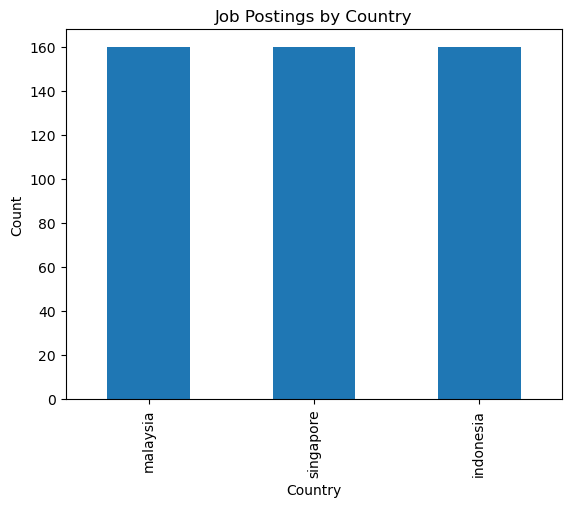

In [7]:
country_counts = df['country'].value_counts()
print(country_counts)
country_counts.plot(kind='bar', title='Job Postings by Country', xlabel='Country', ylabel='Count');

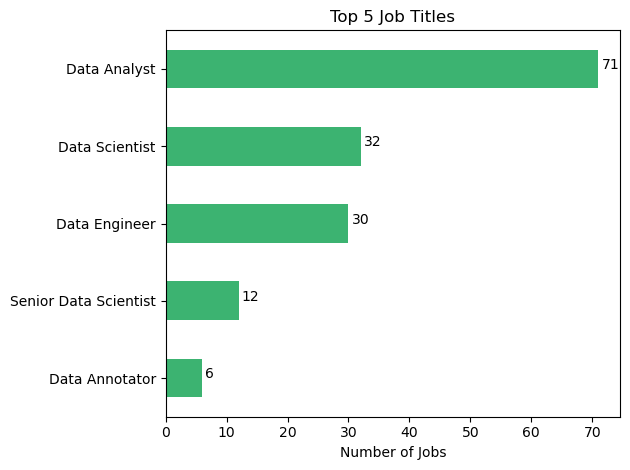

In [8]:
# 2. Top 5 Job Titles
top_titles = df['title'].value_counts().nlargest(5)
top_titles.plot(kind='barh', color='mediumseagreen')
plt.title('Top 5 Job Titles')
plt.xlabel('Number of Jobs')
for i, val in enumerate(top_titles.values):
    plt.text(val + 0.5, i, val)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

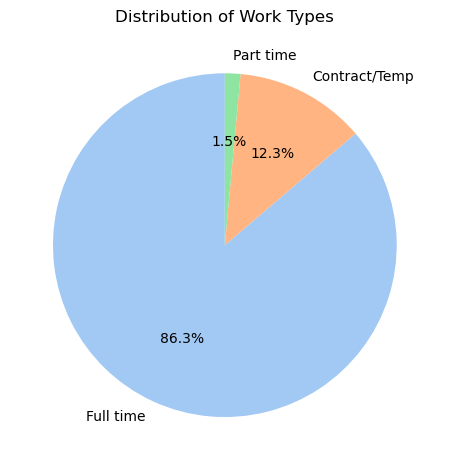

In [9]:
# 3. Work Types Distribution (Work Type)
work_type_counts = df['work_type'].value_counts()
work_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Work Types')
plt.ylabel('')
plt.tight_layout()
plt.show()

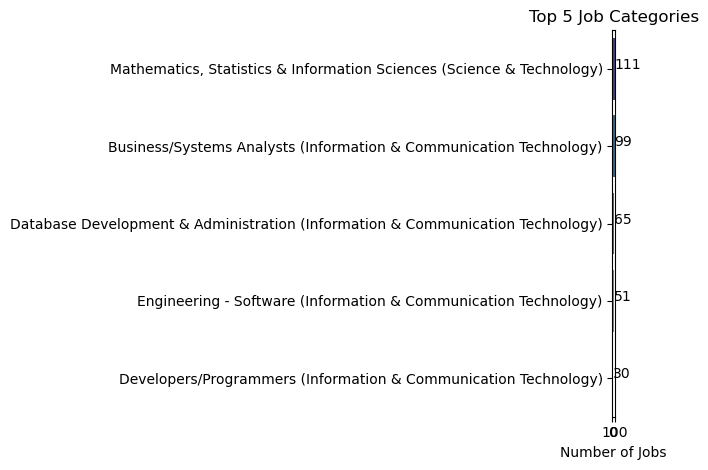

In [10]:
# 4. Top 5 Categories
top_categories = df['category'].value_counts().nlargest(5)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 5 Job Categories')
for i, v in enumerate(top_categories.values):
    plt.text(v + 0.5, i, str(v))
plt.xlabel('Number of Jobs')
plt.tight_layout()
plt.show()

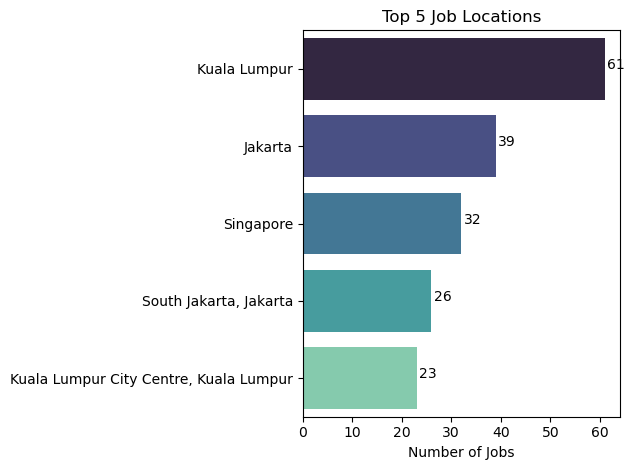

In [11]:
# 5. Top 5 Locations
top_locations = df['location'].value_counts().nlargest(5)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='mako')
plt.title('Top 5 Job Locations')
for i, v in enumerate(top_locations.values):
    plt.text(v + 0.5, i, str(v))
plt.xlabel('Number of Jobs')
plt.tight_layout()
plt.show()

# 04 Text Prepocessing

In [12]:
df = df[["country", "title", "category", "work_type", "description"]]
df2 = df.copy()
df2['description'].tolist()

["ROLE PURPOSE:\nExecute the SupTech and Data Analytics Unit (SDA) projects through the development and deployment of advanced analytics methods that extract insights from financial institutions’ data to pre-empt emerging risks and facilitate effective continuous supervisory function.\nPRINCIPAL ACCOUNTABILITIES:\nDevelop and deploy innovative data analytical tools for supervisors to effectively monitor and identify emerging issues, vulnerabilities, and risks, enabling pre-emptive supervisory actions/interventions.\nCollaborate with other departments such as Digital & Technology Sector and Data Management & Statistics Department to develop and realize data analytics tools.\nSupport and contribute to deliver outcomes under the Supervision sector's SupTech project.\nFacilitate / assist in inherent risk profiling and ongoing surveillance of significant activities of financial institutions, escalating insights to internal stakeholders for further analysis and intervention.\nWork with relev

## a. Case Folding 

### 1. Lowercasing

In [13]:
columns_to_preprocess = ['title', 'category', 'work_type', 'description']

for col in columns_to_preprocess:
    df2[col] = df2[col].str.lower()
df2

,country,title,category,work_type,description
0,malaysia,"data scientist, financial conglomerates superv...",analysis & reporting (banking & financial serv...,full time,role purpose:\nexecute the suptech and data an...
1,malaysia,data scientist,"mathematics, statistics & information sciences...",full time,job description\nresponsibilities\nwork with d...
2,malaysia,data annotator,database development & administration (informa...,full time,job description\nkey responsibilities:\n accur...
3,malaysia,data scientist (artificial intelligence),"mathematics, statistics & information sciences...",full time,"why join us? \nat dcap, we’re dynamic, fast-gr..."
4,malaysia,data scientist,"mathematics, statistics & information sciences...",full time,key responsibilities\ndata exploration & model...
...,...,...,...,...,...
475,indonesia,data scientist,"mathematics, statistics & information sciences...",full time,job descriptions: \nworking closely with the i...
476,indonesia,data scientist - pricing,business/systems analysts (information & commu...,full time,it's fun to work in a company where people tru...
477,indonesia,data analyst,"mathematics, statistics & information sciences...",part time,"tugas dan tanggung jawab:\nmengumpulkan, membe..."
478,indonesia,data analyst – pricing staff,"analysis & reporting (manufacturing, transport...",full time,"key responsibilities:\ncollect, process, and m..."


### 2. Remove URL, Hastag, Emoji

In [14]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Hapus URL
    text = re.sub(r"[\n\r\t]+", " ", text) # Hapus newline dan karakter tab
    text = re.sub(r"@\w+", "", text)  # Hapus mentions (@username)
    text = re.sub(r"[^\w\s]", "", text)  # Hapus tanda baca
    text = re.sub(r"\d+", "", text)  # Hapus angka
    text = re.sub(r"[^\x00-\x7F]+", "", text)  # Hapus emoji & karakter non-ASCII
    text = re.sub(r"\s+", " ", text).strip()  # Hapus spasi berlebih
    text = re.sub(r"[,.!?]", "", text)  # Hapus koma, titik, tanda seru, dan tanda tanya

    if text == "":
        return np.nan  
    return text

df2['clean_text'] = df2['description'].apply(clean_text)

df2.dropna(subset=['clean_text'], inplace=True)
df2[['description', 'clean_text']].head()

,description,clean_text
0,role purpose:\nexecute the suptech and data an...,role purpose execute the suptech and data anal...
1,job description\nresponsibilities\nwork with d...,job description responsibilities work with dat...
2,job description\nkey responsibilities:\n accur...,job description key responsibilities accuratel...
3,"why join us? \nat dcap, we’re dynamic, fast-gr...",why join us at dcap were dynamic fastgrowing t...
4,key responsibilities\ndata exploration & model...,key responsibilities data exploration modellin...


In [15]:
df2['clean_text'].tolist()

['role purpose execute the suptech and data analytics unit sda projects through the development and deployment of advanced analytics methods that extract insights from financial institutions data to preempt emerging risks and facilitate effective continuous supervisory function principal accountabilities develop and deploy innovative data analytical tools for supervisors to effectively monitor and identify emerging issues vulnerabilities and risks enabling preemptive supervisory actionsinterventions collaborate with other departments such as digital technology sector and data management statistics department to develop and realize data analytics tools support and contribute to deliver outcomes under the supervision sectors suptech project facilitate assist in inherent risk profiling and ongoing surveillance of significant activities of financial institutions escalating insights to internal stakeholders for further analysis and intervention work with relevant parties to streamline data 

## b. Language Translate

In [16]:
df_indo = df2[df2['country'] == 'indonesia'].copy()

# Fungsi translate
def translate_text(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except:
        return text  # fallback

cols_to_translate = ['title', 'category', 'work_type', 'clean_text']

for col in cols_to_translate:
    print(f"Translating column: {col}")
    df_indo[f'{col}_en'] = df_indo[col].apply(translate_text)

df2.update(df_indo)
print(df2[df2['country'] == 'indonesia'][cols_to_translate].head())


Translating column: title
Translating column: category
Translating column: work_type
Translating column: clean_text
                          title  \
320              data scientist   
321           it data scientist   
322                data analyst   
323  data scientist (analytics)   
324       senior data scientist   

                                              category  work_type  \
320  business/systems analysts (information & commu...  full time   
321  mathematics, statistics & information sciences...  full time   
322  mathematics, statistics & information sciences...  full time   
323  business/systems analysts (information & commu...  full time   
324  mathematics, statistics & information sciences...  full time   

                                            clean_text  
320  about us group is a leading real estate techno...  
321  deskripsi pekerjaan merencanakan merancang dan...  
322  mengolah data harian yang mencakup data penjua...  
323  company description about

## c. Slang Replacement

In [17]:
df_slang = pd.read_csv("slang.csv")
slang_dict = dict(zip(df_slang['slang'], df_slang['formal']))

additional_slang = {

}
slang_dict.update(additional_slang)

def replace_slang(text):
    if not isinstance(text, str):
        return ""
    words = text.split()
    replaced_words = [slang_dict.get(word, word) for word in words]
    return " ".join(replaced_words)

raw_sample = df2['description'].iloc[50]
case_folding = clean_text(raw_sample)
corrected_text = replace_slang(case_folding)

print('Raw data\t\t:', raw_sample)
print('Case folding\t:', case_folding)
print('Corrected Text\t:', corrected_text)
df2["after_slang"] = df2["clean_text"].apply(replace_slang)

df2["after_slang"] = df2["clean_text"].str.lower()
df2 = df2[df2["after_slang"].str.strip() != ""]
df2.head()


Raw data		: job purpose
create, develop, and sustain power bi reports and dashboards.
data analyst delivers value by taking data, using it to answer questions and communicate the results to help make business decisions.
build and optimize the systems that allow data scientist and analysts to perform their work. ensures data is properly received, transformed, stored, and made accessible to other users.
managing and designing the reporting environment, including data sources, security, and metadata.
supporting the data warehouse in identifying and revising reporting requirements
supporting initiatives for data integrity and normalization
providing technical expertise on data storage structures, data mining, and data cleansing
working alongside teams within the business or the management team to establish business needs.
qualifications:
bachelor’s degree in data analytic or any related field.
preferably experienced with microsoft technology stacks (power bi, database server, ssis, ssrs), 

,country,title,category,work_type,description,clean_text,after_slang
0,malaysia,"data scientist, financial conglomerates superv...",analysis & reporting (banking & financial serv...,full time,role purpose:\nexecute the suptech and data an...,role purpose execute the suptech and data anal...,role purpose execute the suptech and data anal...
1,malaysia,data scientist,"mathematics, statistics & information sciences...",full time,job description\nresponsibilities\nwork with d...,job description responsibilities work with dat...,job description responsibilities work with dat...
2,malaysia,data annotator,database development & administration (informa...,full time,job description\nkey responsibilities:\n accur...,job description key responsibilities accuratel...,job description key responsibilities accuratel...
3,malaysia,data scientist (artificial intelligence),"mathematics, statistics & information sciences...",full time,"why join us? \nat dcap, we’re dynamic, fast-gr...",why join us at dcap were dynamic fastgrowing t...,why join us at dcap were dynamic fastgrowing t...
4,malaysia,data scientist,"mathematics, statistics & information sciences...",full time,key responsibilities\ndata exploration & model...,key responsibilities data exploration modellin...,key responsibilities data exploration modellin...


## c. Tokenizing

In [18]:
def tokenizing_text(text):
    return word_tokenize(text)

df2["tokenizing"] = df2["after_slang"].apply(tokenizing_text)

## d. Stopword Removal

In [19]:
stopword_manual_url = "stopword.csv"
stopword_manual = pd.read_csv(stopword_manual_url, header=None)

custom_stopwords = set(stopword_manual.iloc[:, 0].str.lower())

additional_stopwords = [
    
]
custom_stopwords.update(additional_stopwords)

# Add stopword from NLTK and Sastrawi
factory_stopword = StopWordRemoverFactory()
sastrawi_remover = factory_stopword.create_stop_word_remover()
stopwords_nltk = set(stopwords.words('indonesian'))

def remove_manual_stopwords(tokens):
    return [word for word in tokens if word.lower() not in custom_stopwords]

df2["stopword_removed"] = df2["tokenizing"].apply(remove_manual_stopwords)

df2[["tokenizing", "stopword_removed"]].tail()

,tokenizing,stopword_removed
475,"[job, descriptions, working, closely, with, th...","[job, descriptions, working, closely, internat..."
476,"[its, fun, to, work, in, a, company, where, pe...","[people, job, description, data, science, team..."
477,"[tugas, dan, tanggung, jawab, mengumpulkan, me...","[tugas, tanggung, jawab, mengumpulkan, members..."
478,"[key, responsibilities, collect, process, and,...","[key, responsibilities, collect, process, main..."
479,"[company, description, about, grab, and, our, ...","[description, grab, workplace, grab, southeast..."


## f. Stemming/Lemmatization

In [20]:
def lemmatize_flex(word):
    lemma_v = Word(word).lemmatize("v")
    if lemma_v != word:
        return lemma_v
    else:
        return Word(word).lemmatize("n")

df2['lemmatization'] = df2['stopword_removed'].apply(lambda tokens: [lemmatize_flex(word) for word in tokens])
df2[['stopword_removed','lemmatization']].head()

,stopword_removed,lemmatization
0,"[role, purpose, execute, suptech, data, analyt...","[role, purpose, execute, suptech, data, analyt..."
1,"[job, description, responsibilities, data, sci...","[job, description, responsibility, data, scien..."
2,"[job, description, key, responsibilities, accu...","[job, description, key, responsibility, accura..."
3,"[join, dcap, dynamic, fastgrowing, tech, start...","[join, dcap, dynamic, fastgrowing, tech, start..."
4,"[key, responsibilities, data, exploration, mod...","[key, responsibility, data, exploration, model..."


## Word Cloud

In [21]:
flat_tokens = [word for sublist in df2["lemmatization"] for word in sublist]
fdist = FreqDist(flat_tokens)

print(fdist)
print(fdist.most_common(100))
df_most_common = pd.DataFrame(fdist.most_common(500), columns=["Word", "Frequency"])

<FreqDist with 4872 samples and 87523 outcomes>
[('data', 4720), ('experience', 1318), ('team', 913), ('model', 870), ('skill', 807), ('science', 669), ('analysis', 666), ('engineer', 641), ('learn', 635), ('strong', 590), ('tool', 558), ('process', 552), ('analytics', 538), ('insight', 517), ('support', 501), ('ability', 484), ('develop', 478), ('solution', 470), ('report', 466), ('machine', 449), ('requirement', 439), ('role', 437), ('design', 387), ('ensure', 384), ('ai', 373), ('performance', 373), ('build', 372), ('sql', 365), ('degree', 364), ('stakeholder', 362), ('management', 357), ('computer', 357), ('job', 350), ('knowledge', 343), ('python', 337), ('product', 334), ('field', 330), ('development', 328), ('technology', 328), ('analytical', 326), ('pipeline', 323), ('include', 322), ('responsibility', 309), ('work', 295), ('communication', 289), ('system', 286), ('collaborate', 283), ('maintain', 280), ('provide', 277), ('understand', 277), ('project', 274), ('bachelor', 271),

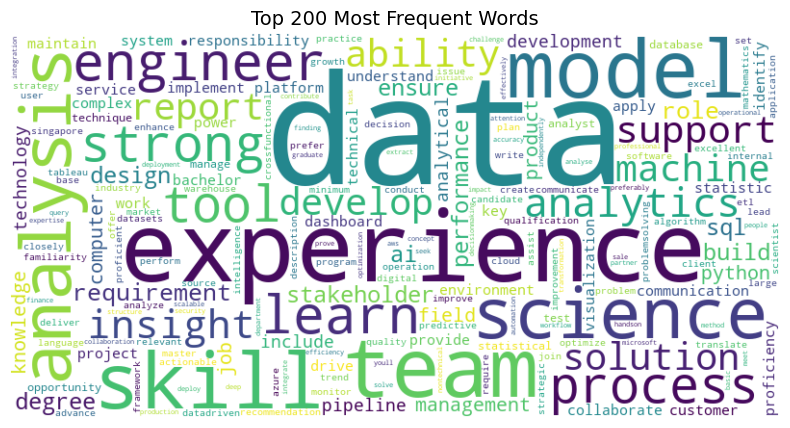

In [22]:
top_200_words = dict(fdist.most_common(200))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_200_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 200 Most Frequent Words", fontsize=14)
plt.show()

## g. Saving Clened Data

In [23]:
df2["tokens"] = df2["lemmatization"]

important_columns = ["title", "tokens"]
df_model = df2[important_columns].copy()
df_model.head()

,title,tokens
0,"data scientist, financial conglomerates superv...","[role, purpose, execute, suptech, data, analyt..."
1,data scientist,"[job, description, responsibility, data, scien..."
2,data annotator,"[job, description, key, responsibility, accura..."
3,data scientist (artificial intelligence),"[join, dcap, dynamic, fastgrowing, tech, start..."
4,data scientist,"[key, responsibility, data, exploration, model..."
